Notebook Overview

1. Loading Python libraries and R environment
2. Installing packages
3. exclude GBA carriers
4. PCA scree plot in EUR

Loading Python libraries 

In [1]:
# Use pathlib for file path manipulation
import pathlib

# Install numpy
import numpy as np

# Install Pandas for tabular data
import pandas as pd

# Install plotnine: a ggplot2-compatible Python plotting package
from plotnine import *

# Always show all columns in a Pandas DataFrame
pd.set_option('display.max_columns', None)

Set paths

In [2]:
WORK_DIR = "~/workspace/ws_files/"

In [3]:
REL10_PATH = pathlib.Path(pathlib.Path.home(), 'workspace/gp2_tier2_eu_release10')
!ls -hal {REL10_PATH}

total 100K
dr-xr-xr-x. 1 jupyter users    0 Sep  7 12:53 clinical_data
dr-xr-xr-x. 1 jupyter users    0 Sep  7 12:53 imputed_genotypes
dr-xr-xr-x. 1 jupyter users    0 Sep  7 12:53 meta_data
dr-xr-xr-x. 1 jupyter users    0 Sep  7 12:53 raw_genotypes
dr-xr-xr-x. 1 jupyter users    0 Sep  7 12:53 raw_genotypes_flipped
-r--r--r--. 1 jupyter users 100K Jun 30 20:07 README_release10_01072025.txt
dr-xr-xr-x. 1 jupyter users    0 Sep  7 12:53 wgs


In [12]:
%%bash
# making working directory
# Loop over all the ancestries
for ancestry in AAC AFR AJ AMR CAS EAS FIN MDE SAS CAH EUR
do
    # Make a folder for each ancestry
    mkdir -p ~/workspace/ws_files/"$ancestry"
done

install packages

PLINK

In [ ]:
%%bash

mkdir -p ~/tools
cd ~/tools

if test -e /home/jupyter/tools/plink; then
echo "Plink1.9 is already installed in /home/jupyter/tools/"

else
echo -e "Downloading plink \n    -------"
wget -N http://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20190304.zip 
unzip -o plink_linux_x86_64_20190304.zip
echo -e "\n plink downloaded and unzipped in /home/jupyter/tools \n "

fi

In [ ]:
%%capture
%%bash

# Install plink 2.0
cd /home/jupyter/tools/
if test -e /home/jupyter/tools/plink2; then

echo "Plink2 is already installed in /home/jupyter/tools/"
else
echo "Plink2 is not installed"
cd /home/jupyter/tools/

wget http://s3.amazonaws.com/plink2-assets/plink2_linux_x86_64_latest.zip

unzip -o plink2_linux_x86_64_latest.zip

fi

In [9]:
%%bash

# Install ANNOVAR:
# https://www.openbioinformatics.org/annovar/annovar_download_form.php

if test -e /home/jupyter/tools/annovar; then

echo "annovar is already installed in /home/jupyter/tools/"
else
echo "annovar is not installed"
cd /home/jupyter/tools/

wget http://www.openbioinformatics.org/annovar/download/0wgxR2rIVP/annovar.latest.tar.gz

tar xvfz annovar.latest.tar.gz

fi

annovar is already installed in /home/jupyter/tools/


Install ANNOVAR: Download sources of annotation

In [10]:
%%bash

cd /home/jupyter/tools/annovar/

perl annotate_variation.pl -buildver hg38 -downdb -webfrom annovar refGene humandb/
perl annotate_variation.pl -buildver hg38 -downdb -webfrom annovar clinvar_20140902 humandb/
#perl annotate_variation.pl -buildver hg38 -downdb cytoBand humandb/
#perl annotate_variation.pl -buildver hg38 -downdb -webfrom annovar ensGene humandb/
#perl annotate_variation.pl -buildver hg38 -downdb -webfrom annovar exac03 humandb/ 
#perl annotate_variation.pl -buildver hg38 -downdb -webfrom annovar avsnp147 humandb/ 
#perl annotate_variation.pl -buildver hg38 -downdb -webfrom annovar dbnsfp30a humandb/
#perl annotate_variation.pl -buildver hg38 -downdb -webfrom annovar gnomad211_genome humandb/
#perl annotate_variation.pl -buildver hg38 -downdb -webfrom annovar ljb26_all humandb/

NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg38_refGene.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg38_refGeneMrna.fa.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg38_refGeneVersion.txt.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished downloading annotation files for hg38 build version, with files saved at the 'humandb' directory
NOTICE: Web-based checking to see whether ANNOVAR new version is available ... Done
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg38_clinvar_20140902.txt.gz ... OK
NOTICE: Downloading annotation database http://www.openbioinformatics.org/annovar/download/hg38_clinvar_20140902.txt.idx.gz ... OK
NOTICE: Uncompressing downloaded files
NOTICE: Finished d

exclude GBA carriers

GBA1 cohort definition

Annotation of the gene

Extract the region using PLINK

Extract GBA1 gene in NBA cohort(excluding tuepac)

GBA1 coordinates: Chromosome 1:155234452-1:155244699(GRCh38/hg38)

In [17]:
## extract region using plink
ancestries = {'AAC','AFR','AJ','AMR','CAS','EAS','FIN','MDE','SAS','CAH','EUR'}

for ancestry in ancestries:
    
    WORK_DIR = f'~/workspace/ws_files/{ancestry}'

    ! /home/jupyter/tools/plink2 \
    --pfile {REL10_PATH}/imputed_genotypes/{ancestry}/chr1_{ancestry}_release10_vwb \
    --chr 1 \
    --from-bp 155184452 \
    --to-bp 155294699 \
    --make-bed \
    --out {WORK_DIR}/{ancestry}_GBA1

PLINK v2.0.0-a.7LM 64-bit Intel (7 Jul 2025)       cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/jupyter/workspace/ws_files/SAS/SAS_GBA1.log.
Options in effect:
  --chr 1
  --from-bp 155184452
  --make-bed
  --out /home/jupyter/workspace/ws_files/SAS/SAS_GBA1
  --pfile /home/jupyter/workspace/gp2_tier2_eu_release10/imputed_genotypes/SAS/chr1_SAS_release10_vwb
  --to-bp 155294699

Start time: Thu Jul 24 13:25:47 2025
26046 MiB RAM detected, ~24584 available; reserving 13023 MiB for main
workspace.
Using up to 4 compute threads.
945 samples (339 females, 606 males; 945 founders) loaded from
/home/jupyter/workspace/gp2_tier2_eu_release10/imputed_genotypes/SAS/chr1_SAS_release10_vwb.psam.
2537241 variants loaded from
/home/jupyter/workspace/gp2_tier2_eu_release10/imputed_genotypes/SAS/chr1_SAS_release10_vwb.pvar.
1 binary phenotype loaded (317 cases, 269 controls).
965 variants remaining after main filters.
done.

In [18]:
## extract region using plink
ancestries = {'AAC','AFR','AJ','AMR','CAS','EAS','FIN','MDE','SAS','CAH', 'EUR'}

for ancestry in ancestries:
    
    WORK_DIR = f'~/workspace/ws_files/{ancestry}'

    ! /home/jupyter/tools/plink2 \
    --bfile {WORK_DIR}/{ancestry}_GBA1 \
    --extract ~/workspace/ws_files/GBA1.txt \
    --make-bed \
    --out {WORK_DIR}/{ancestry}_GBA1_risk

PLINK v2.0.0-a.7LM 64-bit Intel (7 Jul 2025)       cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/jupyter/workspace/ws_files/SAS/SAS_GBA1_risk.log.
Options in effect:
  --bfile /home/jupyter/workspace/ws_files/SAS/SAS_GBA1
  --extract /home/jupyter/workspace/ws_files/GBA1.txt
  --make-bed
  --out /home/jupyter/workspace/ws_files/SAS/SAS_GBA1_risk

Start time: Thu Jul 24 13:28:59 2025
26046 MiB RAM detected, ~24506 available; reserving 13023 MiB for main
workspace.
Using up to 4 compute threads.
945 samples (339 females, 606 males; 945 founders) loaded from
/home/jupyter/workspace/ws_files/SAS/SAS_GBA1.fam.
965 variants loaded from /home/jupyter/workspace/ws_files/SAS/SAS_GBA1.bim.
1 binary phenotype loaded (317 cases, 269 controls).
--extract: 2 variants remaining.
2 variants remaining after main filters.
done.ng /home/jupyter/workspace/ws_files/SAS/SAS_GBA1_risk.fam ... 
done.ng /home/jupyter/workspace/ws_fil

In [19]:
# GBA risk
#--recode A creates a new text fileset, showing each variant in each case and control for the minor allele (A).
# Also extract the significant variants 
ancestries = {'AAC','AFR','AJ','AMR','CAS','EAS','FIN','MDE','SAS','CAH', 'EUR'}

for ancestry in ancestries:
    
    WORK_DIR = f'~/workspace/ws_files/{ancestry}'

    ! /home/jupyter/tools/plink \
    --bfile {WORK_DIR}/{ancestry}_GBA1_risk \
    --keep {WORK_DIR}/{ancestry}.samplestoKeep \
    --extract ~/workspace/ws_files/GBA1.txt \
    --recode A \
    --out {WORK_DIR}/GBA1_risk

PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/jupyter/workspace/ws_files/SAS/GBA1_risk.log.
Options in effect:
  --bfile /home/jupyter/workspace/ws_files/SAS/SAS_GBA1_risk
  --extract /home/jupyter/workspace/ws_files/GBA1.txt
  --keep /home/jupyter/workspace/ws_files/SAS/SAS.samplestoKeep
  --out /home/jupyter/workspace/ws_files/SAS/GBA1_risk
  --recode A

26046 MB RAM detected; reserving 13023 MB for main workspace.
2 variants loaded from .bim file.
945 people (606 males, 339 females) loaded from .fam.
586 phenotype values loaded from .fam.
--extract: 2 variants remaining.
--keep: 876 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 876 founders and 0 nonfounders present.
Calculating allele frequencies... done.
2 variants and 876 people pass filters and QC.
Among remaining phenotypes, 313 are cases and 26

In [37]:
WORK_DIR = f'~/workspace/ws_files/'

In [ ]:
recode = pd.read_csv(f'{WORK_DIR}/EUR/GBA1_risk.raw', sep='\s+')
recode

In [ ]:
recode_risk = recode.copy()
# Define the list of GBA1 variant column names
gba1_variants = [
    'chr1:155235196:G:A_A',
    'chr1:155235205:C:G_G',
    'chr1:155235843:T:C_C',
    'chr1:155236246:G:A_A',
    'chr1:155236376:C:T_T',
    'chr1:155237394:G:A_A',
    'chr1:155237412:T:C_C',
    'chr1:155237438:C:T_T',
    'chr1:155237453:C:T_T',
    'chr1:155238200:C:T_T',
    'chr1:155238570:C:G_G',
    'chr1:155238630:G:A_A',
    'chr1:155239972:C:G_G',
]

# Add the GBA1_status column
recode_risk['GBA1_status'] = recode_risk[gba1_variants].apply(
    lambda row: 'risk' if any(val in [1.0, 2.0] for val in row) else '',
    axis=1
)
recode_risk

In [65]:
# Filter for GBA1 risk carriers
risk_carriers = recode_risk[recode_risk['GBA1_status'] == 'risk']
# Count PHENOTYPE values
risk_carriers['PHENOTYPE'].value_counts()

PHENOTYPE
 2    5
-9    5
 1    3
Name: count, dtype: int64

In [66]:
# save sample ID of risk carriers
samples_toKeep = risk_carriers[['FID', 'IID']].copy()
samples_toKeep.to_csv(f'~/workspace/ws_files/EAS/GBA1.samplestoKeep.txt', sep = '\t', index=False, header=None)

In [67]:
# exclude GBA from covariate file
EAS = pd.read_csv(f'{WORK_DIR}/EAS/EAS_covariate_file.txt', sep = '\t')

# Filter out samples in samples_toKeep from AAC
filtered_EAS = EAS[~EAS['IID'].isin(samples_toKeep['IID'])]

# Save to a new text file
filtered_EAS.to_csv(f'{WORK_DIR}/EAS/EAS_covariate_file_noGBA.txt', sep='\t', index=False)

PCA scree plot in EUR

In [6]:
EUR = pd.read_csv(f'{WORK_DIR}/EUR/EUR_covariate_file_noGBA.txt', sep='\t')

In [89]:
EUR

,FID,IID,FATID,MATID,SEX,AGE,PHENO
0,0,AAPDGC_000147,0,0,1.0,67.0,1.0
1,0,ANDPD_000001,0,0,1.0,64.0,2.0
2,0,ANDPD_000002,0,0,1.0,65.0,2.0
3,0,ANDPD_000003,0,0,1.0,30.0,1.0
4,0,ANDPD_000004,0,0,1.0,76.0,2.0
...,...,...,...,...,...,...,...
55983,0,YMS_000076,0,0,1.0,74.0,NaN
55984,0,YMS_000077,0,0,2.0,51.0,NaN
55985,0,YMS_000078,0,0,1.0,71.0,2.0
55986,0,YMS_000079,0,0,1.0,63.0,NaN


In [5]:
pcs = pd.read_csv(f'{REL10_PATH}/meta_data/qc_metrics/projected_pcs_vwb.csv')
pcs

,FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,label
0,0,AAPDGC_000001,-4.871350,-31.969234,-9.842733,-9.790264,-10.188376,-4.664025,14.940621,2.508738,-7.634075,3.304693,-3.864311,6.886280,5.016497,-1.855085,0.648208,2.321017,0.577832,1.010839,-2.696211,0.168772,-0.894954,1.583760,-1.068602,-1.287641,1.413052,-1.169021,-2.070977,-1.897723,0.189316,-0.182431,-3.876044,-5.223404,-1.245654,0.440408,-1.015992,-0.447376,-2.824605,0.867166,1.265563,1.771299,1.819903,1.429343,-2.552484,-3.880580,-0.572989,-1.587006,-0.356547,-0.439826,3.043394,2.074281,new
1,0,AAPDGC_000002,-7.759796,-35.485258,-7.760101,-14.084383,-14.419799,-3.692417,22.053684,5.100432,-8.466253,2.016166,-8.554606,9.196673,2.071291,-1.914613,-0.440376,-1.841641,2.088705,-2.073774,-4.371634,2.038305,1.046749,-1.811502,-1.523057,0.037758,2.197928,-2.013779,-1.166108,0.396140,1.504462,2.270530,1.342533,-2.545868,-5.195434,-0.022680,-0.522263,-3.757612,1.067121,2.302236,1.850974,3.305312,2.626194,-0.374340,0.563620,0.357918,-1.102005,0.236951,1.147934,-0.166944,-1.877312,1.764471,new
2,0,AAPDGC_000003,-7.170614,-30.612125,-7.394064,-15.662787,-11.221790,-5.249270,20.398616,7.110454,-6.134858,3.524992,-6.432500,7.926220,3.142452,-3.024570,2.242694,-2.519424,0.519427,2.141023,-2.056273,4.869582,0.764809,0.930737,-0.868646,5.643874,0.944014,1.268316,1.631118,0.269409,-0.439699,1.224762,1.536157,-1.145277,-1.737594,1.576645,3.243526,-1.007667,-5.328619,1.599188,-0.133970,0.349270,2.972314,-0.444475,-0.770224,1.645999,0.197395,-0.308341,-1.129797,-0.211110,0.920944,2.305118,new
3,0,AAPDGC_000005,-1.878095,-30.714858,-10.829958,-15.434649,-15.114180,-0.581369,13.775768,1.581656,-6.202391,5.254562,-1.660543,5.064515,1.006163,-3.129452,-3.209744,-3.448591,-1.230293,-2.592503,-1.377370,4.224315,4.154968,-2.666156,-0.596585,1.367831,0.351466,0.418860,-0.597551,-0.501334,3.610510,0.981842,0.822684,-1.457466,-3.755939,0.043855,3.670234,-2.014561,0.057090,1.789881,0.021197,2.266755,2.547627,1.104815,-1.047439,3.429098,1.061186,-1.551846,0.420242,1.699006,-0.581521,2.182378,new
4,0,AAPDGC_000006,-3.468988,-32.315069,-9.459522,-14.253761,-15.503322,-4.635533,16.740598,1.860730,-6.172821,3.674574,-3.568574,6.117776,-0.667622,-2.626419,-0.133943,-0.419575,1.222401,-0.107099,-5.033753,5.024332,2.052920,-4.555906,-0.249778,1.209767,0.475780,2.406159,3.675134,-1.242137,3.377482,2.691542,0.218551,-4.373538,-4.068856,-2.685019,1.349030,-4.342639,-1.989756,-1.910415,2.296493,0.782903,1.770168,-0.991941,-1.343160,2.981362,1.656414,-1.624729,1.649698,0.580510,0.088024,0.093215,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86916,0,YMS_000078,-36.221250,-37.047493,-12.569943,-8.931165,18.791872,-1.668663,-1.743313,0.323359,0.920628,0.280758,2.691186,-3.028348,3.143112,0.664447,-3.896509,-1.867138,-7.741136,-5.097356,5.521748,2.539671,-1.464171,1.714276,2.620571,-2.220985,1.304164,-3.088338,5.192133,-1.464031,2.383478,1.017674,1.620558,-0.069713,2.256536,-2.290018,1.004623,0.102835,1.190216,2.470310,-0.281662,-0.191191,0.300502,2.615833,-1.001759,1.823743,-3.077872,1.602118,-0.212285,2.490814,0.144103,2.202804,new
86917,0,YMS_000079,-27.488074,-29.009640,-9.075999,-6.896220,14.890854,0.439730,-0.668537,0.319834,2.034178,1.041253,1.687360,1.666384,-2.418627,-0.861004,0.481167,2.934090,0.275072,0.194181,-0.501243,0.461596,0.073155,0.170627,-1.144529,-0.963286,0.026852,1.384958,0.321134,0.413962,1.226201,-0.173297,0.267345,0.416434,0.311436,-0.050344,0.351124,1.926886,0.784614,1.220521,1.437949,-0.253142,-0.849114,-0.008512,0.835787,2.249003,-1.333911,-0.075256,0.233546,-0.562880,-0.446255,0.508289,new
86918,0,YMS_000080,-30.206

In [7]:
# Merge EUR with pcs on 'IID' to add PC columns to EUR
EUR_pcs = EUR.merge(pcs, on='IID', how='left')
EUR_pcs

,FID_x,IID,FATID,MATID,SEX,AGE,PHENO,PC1_x,PC2_x,PC3_x,PC4_x,PC5_x,FID_y,PC1_y,PC2_y,PC3_y,PC4_y,PC5_y,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,label
0,0,AAPDGC_000147,0,0,1.0,67.0,1.0,-14.686582,-30.340570,-7.830373,-15.826340,-8.408113,0,-14.686582,-30.340570,-7.830373,-15.826340,-8.408113,1.401770,16.106189,5.024792,-5.072834,0.391819,-1.530003,-0.493629,0.791831,-3.747123,0.533088,1.016474,-2.656190,-3.152506,1.248048,3.721554,-0.183752,-0.365981,1.708682,2.722044,-0.339704,-1.474263,1.007053,3.595431,3.383091,2.090501,-0.106003,-2.727483,-1.592086,-1.387766,0.910154,0.137763,-2.549593,2.498994,0.324335,-0.875236,6.069239,-2.835944,-0.003552,4.378598,0.238709,0.965873,-1.379306,-0.305500,-0.278630,2.176195,new
1,0,ANDPD_000001,0,0,1.0,64.0,2.0,-33.235639,-34.961051,-10.882285,-7.429261,23.350928,0,-33.235639,-34.961051,-10.882285,-7.429261,23.350928,-0.316805,0.876109,-0.882229,3.682948,0.177764,2.592421,-2.776352,-2.173572,-0.869941,0.741066,-0.823718,1.096845,0.475973,-1.716617,-2.369622,-3.113140,1.539242,-1.742603,1.090424,-0.152917,2.268447,-3.271680,-1.096677,-0.328045,-0.924469,0.532852,2.689573,-1.093399,0.294018,-0.517293,-0.120626,1.250956,-0.004639,0.541255,2.964398,-1.603041,-0.988342,2.538397,-1.224319,0.839521,0.116207,-2.536736,-0.194294,-0.023955,2.153529,new
2,0,ANDPD_000002,0,0,1.0,65.0,2.0,-34.078096,-35.337399,-13.846506,-9.232306,23.676739,0,-34.078096,-35.337399,-13.846506,-9.232306,23.676739,1.887965,-5.838274,0.571302,2.995751,2.275564,-1.052216,1.088445,-0.604704,1.337238,1.726177,-1.040809,0.251025,1.005824,-2.561184,-0.358531,-0.089473,0.333746,-0.430844,-1.064077,1.251664,1.790938,2.333696,-0.688862,-2.038195,-1.354908,-2.013798,-1.514567,1.567762,-0.313575,1.174640,3.229689,1.873561,-3.292043,-4.003519,0.353261,0.874381,-1.776014,2.501264,2.130055,1.628894,0.861697,-3.543620,0.498725,0.992662,3.248387,new
3,0,ANDPD_000003,0,0,1.0,30.0,1.0,-33.435853,-34.732074,-10.891974,-7.954141,23.864586,0,-33.435853,-34.732074,-10.891974,-7.954141,23.864586,-3.252952,-1.391512,2.228002,2.770048,-0.272714,-1.422783,0.213026,-1.981044,1.930020,-0.083967,-0.092236,0.103350,2.699563,4.763678,0.066632,-1.985562,-1.636356,-0.630804,-0.303499,-0.640406,3.675996,-2.786536,1.466103,-4.002395,-0.796317,-0.443650,1.901899,-2.944830,3.346161,1.985620,-0.458756,2.400968,-3.391440,-0.295740,-1.316176,2.539672,-2.433119,-0.424365,-0.765130,-3.431597,-0.652975,-1.543114,0.342213,-1.350729,1.692278,new
4,0,ANDPD_000004,0,0,1.0,76.0,2.0,-24.534639,-24.414283,-5.037150,-6.386778,15.564347,0,-24.534639,-24.414283,-5.037150,-6.386778,15.564347,1.977192,1.547306,0.502752,-4.094210,-1.676227,2.140988,0.798252,-2.928868,-0.968422,1.144115,1.974935,1.180974,-1.023928,-0.962418,-1.131094,0.928437,-0.502986,-1.345897,1.182465,-0.730291,-0.163805,0.333747,-0.308563,-3.616877,0.258341,-0.325955,-2.895184,1.807105,-1.448803,2.060758,0.264535,0.598450,-0.948651,-1.638427,0.505986,1.207121,0.691402,1.877669,-1.100921,1.733846,0.967549,2.638909,-0.597181,-1.064776,1.537844,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55983,0,YMS_000076,0,0,1.0,74.0,NaN,-33.963005,-36.525212,-9.916346,-6.435468,20.716051,0,-33.963005,-36.525212,-9.916346,-6.435468,20.716051,-1.981099,-2.414497,-0.347305,1.962335,-1.125699,0.111036,0.732800,-0.783362,3.501006,-0.092574,2.625726,1.079880,2.886479,-1.798630,-0.245528,-0.448600,2.310294,1.112282,0.786446,0.055106,1.494738,3.332951,-2.055657,1.488370,-0.026789,-0.718294,-0.966021,0.045226,-0.882702,-0.477933,1.497154,0.030496,0.251415,-0.029462,-2.306517,-1.970672,1.172766,0.998413,-1.350626,-0.702417,0.168728,1.732783,2

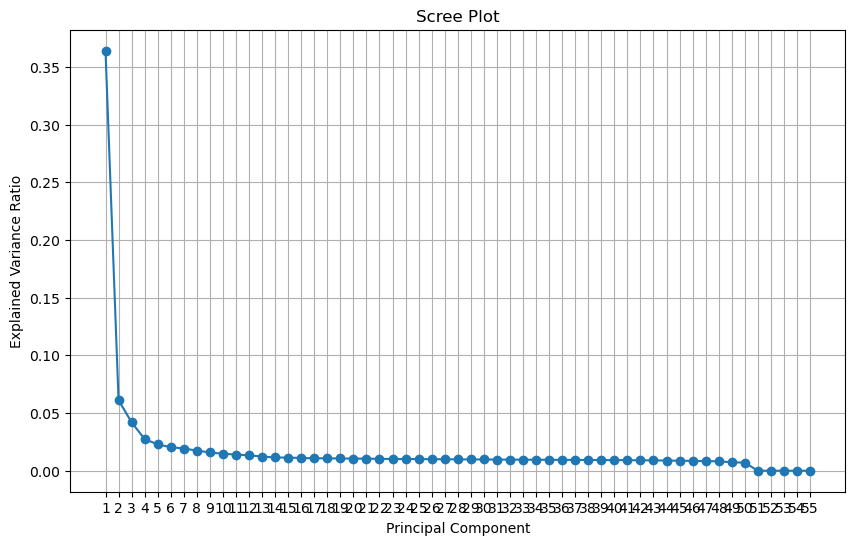

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract only the PC columns from EUR_pcs
pc_columns = [col for col in EUR_pcs.columns if col.startswith('PC')]
X = EUR_pcs[pc_columns].dropna()

# Fit PCA on PC values
pca = PCA()
pca.fit(X)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1))
plt.grid(True)
# save scree plot
plt.savefig('/home/jupyter/workspace/ws_files/EUR/scree_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [97]:
# save scree plot
plt.savefig('/home/jupyter/workspace/ws_files/EUR/scree_plot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>